In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
col_names = [
    'engine', 'cycle',
    'op_setting_1', 'op_setting_2', 'op_setting_3',
] + [f'sensor_{i}' for i in range(1, 22)]

In [3]:
train = pd.read_csv(
    "train_FD001.txt",
    delim_whitespace=True,
    header=None
)

train = train.dropna(axis=1)
train.columns = col_names
train.head()

C:\Users\sathv\AppData\Local\Temp\ipykernel_35800\1710179487.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train = pd.read_csv(


,engine,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
max_cycle = train.groupby('engine')['cycle'].max()

train['RUL'] = train.apply(
    lambda row: max_cycle[row['engine']] - row['cycle'],
    axis=1
)

train.head()

,engine,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191.0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0


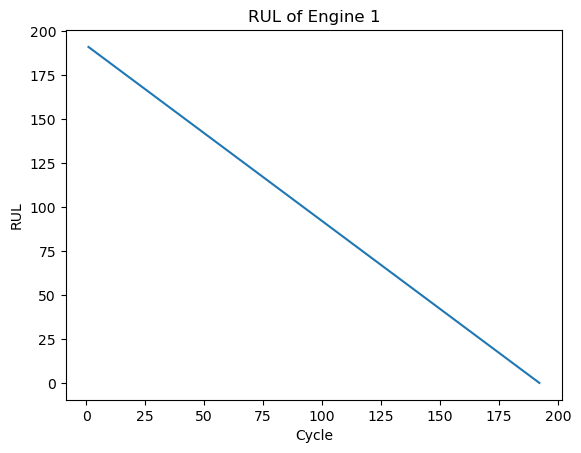

In [5]:
plt.plot(train[train.engine == 1]['cycle'], train[train.engine == 1]['RUL'])
plt.xlabel("Cycle")
plt.ylabel("RUL")
plt.title("RUL of Engine 1")
plt.show()

In [6]:
X = train.drop(['RUL', 'engine'], axis=1)
y = train['RUL']

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
model = RandomForestRegressor(
    n_estimators=150,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [10]:
pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

np.float64(35.9082828723199)

In [12]:
test = pd.read_csv(
    "test_FD001.txt",
    delim_whitespace=True,
    header=None
)

test = test.dropna(axis=1)
test.columns = col_names
test.head()

C:\Users\sathv\AppData\Local\Temp\ipykernel_35800\4244601857.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_csv(


,engine,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [13]:
X_test_final = test.drop(['engine'], axis=1)
X_test_final_scaled = scaler.transform(X_test_final)

In [14]:
test_pred = model.predict(X_test_final_scaled)

In [15]:
actual_rul = pd.read_csv(
    "RUL_FD001.txt",
    sep=r"\s+",
    header=None
)

actual = actual_rul[0].values

In [16]:
final_rmse = np.sqrt(mean_squared_error(actual, test_pred[:len(actual)]))
final_rmse

np.float64(116.56283247340133)

In [19]:
final_output = pd.DataFrame({
    "True_RUL": actual,
    "Predicted_RUL": test_pred[:len(actual)]
})

final_output.to_csv("Final_Output.csv", index=False)

print("Output Successfully Exported!")

Output Successfully Exported!
